In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-04-16 21:15:26.315545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
from sklearn import datasets
plt.figure(figsize=(1,1))
digits = datasets.load_digits()

<Figure size 100x100 with 0 Axes>

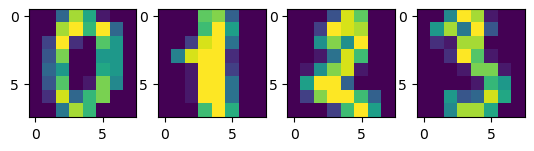

In [61]:
fig, ax = plt.subplots(1,4)
ax[0].imshow(digits.images[0])
ax[1].imshow(digits.images[1])
ax[2].imshow(digits.images[2])
ax[3].imshow(digits.images[3])

plt.show()

In [52]:
n_samples = digits.images.shape[0]
data = digits.images.reshape((n_samples,-1))

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.05,shuffle=False)

In [53]:
# create column names for our model input function
columns = ['p_'+str(i) for i in range(1,65)]

In [55]:
feature_columns =[]
for col in columns:
    feature_columns.append(tf.feature_column.numeric_column(key=col))

In [56]:
feature_columns

[NumericColumn(key='p_1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_10', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='p_11', sh

In [93]:
def input_fn(features,labels,training=True,batch_size=32):
    #converts inputs to a dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [94]:
classifier = tf.estimator.DNNClassifier(hidden_units=[256,128,64],
                                       feature_columns=feature_columns,optimizer='Adagrad',n_classes=10,model_dir='classifier')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'classifier', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [95]:
dftrain = pd.DataFrame(x_train,columns=columns)

In [96]:
dftrain.head()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,...,p_55,p_56,p_57,p_58,p_59,p_60,p_61,p_62,p_63,p_64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [97]:
classifier.train(input_fn=lambda:input_fn(dftrain,y_train,training=True),steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from classifier/model.ckpt-2000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2000...
INFO:tensorflow:Saving checkpoints for 2000 into classifier/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2000...
INFO:tensorflow:loss = 0.0764341, step = 2000
INFO:tensorflow:global_step/sec: 207.797
INFO:tensorflow:loss = 0.04174891, step = 2100 (0.482 sec)
INFO:tensorflow:global_step/sec: 336.787
INFO:tensorflow:loss = 0.037335135, step = 2200 (0.297 sec)
INFO:tensorflow:global_step/sec: 301.112
INFO:tensorflow:loss = 0.031600498, step = 2300 (0.332 sec)
INFO:tensorflow:global_step/sec: 324.501
INFO:ten

In [71]:
Number_of_epochs = (32 * 2000) / (n_samples)

In [72]:
Number_of_epochs

35.61491374513077

In [73]:
dftest = pd.DataFrame(x_test,columns=columns)
classifier.evaluate(input_fn=lambda:input_fn(dftest,y_test,training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-04-17T12:03:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from classifier/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.59633s
INFO:tensorflow:Finished evaluation at 2023-04-17-12:03:02
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.93333334, average_loss = 0.16683899, global_step = 2000, loss = 0.1617678
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: classifier/model.ckpt-2000


{'accuracy': 0.93333334,
 'average_loss': 0.16683899,
 'loss': 0.1617678,
 'global_step': 2000}

In [74]:
%load_ext tensorboard

In [75]:
%tensorboard --logdir ./classifier

In [79]:
def predict_input_fn(features,batch_size=32):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

In [80]:
test = dftest.iloc[:2,:]
expected = y_test[:2].tolist()


In [84]:
pred = classifier.predict(input_fn=lambda:predict_input_fn(test))

In [85]:
pred

<generator object Estimator.predict at 0x7fc96f588850>

In [86]:
for pred_dict, expec in zip(pred, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    print('predicted class {} ,probability of prediction {} ,expected label {}'.format(class_id,probability,expec))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from classifier/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
predicted class 8 ,probability of prediction 0.9812490940093994 ,expected label 8
predicted class 4 ,probability of prediction 0.9976891279220581 ,expected label 4


In [87]:
dftrain,y_train

(      p_1  p_2   p_3   p_4   p_5   p_6  p_7  p_8  p_9  p_10  ...  p_55  p_56  \
 0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   
 1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   
 2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0   0.0  ...   5.0   0.0   
 3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0   8.0  ...   9.0   0.0   
 4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   
 ...   ...  ...   ...   ...   ...   ...  ...  ...  ...   ...  ...   ...   ...   
 1702  0.0  0.0   7.0  11.0  13.0   8.0  1.0  0.0  0.0   1.0  ...   0.0   0.0   
 1703  0.0  0.0   4.0  14.0  11.0   3.0  0.0  0.0  0.0   0.0  ...   2.0   0.0   
 1704  0.0  0.0  12.0  16.0  14.0   8.0  0.0  0.0  0.0   7.0  ...   1.0   0.0   
 1705  0.0  0.0   7.0  14.0  11.0   0.0  0.0  0.0  0.0   1.0  ...   4.0   0.0   
 1706  0.0  0.0   9.0  16.0  14.0   6.0  0.0  0.0  0.0   6.0  ...   1.0   0.0   
 
       p_57  p_58  p_59  p